# ***Dry_Bean_Dataset***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# **Load dataset**

In [ ]:
#Load dataset
df = pd.read_csv("/content/sample_data/Dry_Bean_Dataset (1).csv")


# **Remove duplicate rows**

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# **Detect and remove outliers using IQR method**

In [ ]:
# Detect and remove outliers using IQR method
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask]

# Encode categorical target column
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])


# **Save cleaned dataset**


In [ ]:
# Save cleaned dataset
df.to_csv("Cleaned_Dry_Bean_Dataset.csv", index=False)

# Display first few rows
print(df.head())


     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
23  31637    656.711       229.719255       175.510446      1.308864   
24  31675    657.431       236.752632       171.210559      1.382816   
29  31811    642.092       223.984683       180.917123      1.238051   
31  31823    662.532       222.872689       181.894696      1.225284   
32  31837    656.404       224.912554       180.439422      1.246471   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
23      0.645191       32045     200.702465  0.761823  0.987268   0.921842   
24      0.690678       32009     200.822963  0.740936  0.989565   0.920929   
29      0.589565       32052     201.253629  0.773877  0.992481   0.969600   
31      0.577858       32274     201.291585  0.774848  0.986026   0.911040   
32      0.596968       32238     201.335857  0.785246  0.987561   0.928538   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
23     0.873686  

In [ ]:
print(df.tail())

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10539 entries, 23 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10539 non-null  int64  
 1   Perimeter        10539 non-null  float64
 2   MajorAxisLength  10539 non-null  float64
 3   MinorAxisLength  10539 non-null  float64
 4   AspectRation     10539 non-null  float64
 5   Eccentricity     10539 non-null  float64
 6   ConvexArea       10539 non-null  int64  
 7   EquivDiameter    10539 non-null  float64
 8   Extent           10539 non-null  float64
 9   Solidity         10539 non-null  float64
 10  roundness        10539 non-null  float64
 11  Compactness      10539 non-null  float64
 12  ShapeFactor1     10539 non-null  float64
 13  ShapeFactor2     10539 non-null  float64
 14  ShapeFactor3     10539 non-null  float64
 15  ShapeFactor4     10539 non-null  float64
 16  Class            10539 non-null  int64  
dtypes: float64(14), 

In [ ]:
print (df.describe())

               Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count  10539.000000  10539.000000     10539.000000     10539.000000   
mean   46988.053516    811.044205       303.509859       193.318250   
std    16127.410427    153.063406        62.373074        28.886792   
min    20420.000000    524.736000       183.601165       136.709958   
25%    35192.000000    694.113000       253.280692       172.719645   
50%    42722.000000    774.160000       287.415858       189.297278   
75%    55322.000000    919.395500       354.354089       207.180512   
max    98270.000000   1276.178000       483.691256       278.942451   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent  \
count  10539.000000  10539.000000  10539.000000   10539.000000  10539.000000   
mean       1.567089      0.754725  47575.100958     241.241304      0.751998   
std        0.196776      0.068557  16381.635541      40.371225      0.043734   
min        1.220549      0.573360  20684

# **Extract features (X) and target (y)**

In [ ]:
# Extract features (X) and target (y)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values


# **Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Standardize features**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Data Visualization**

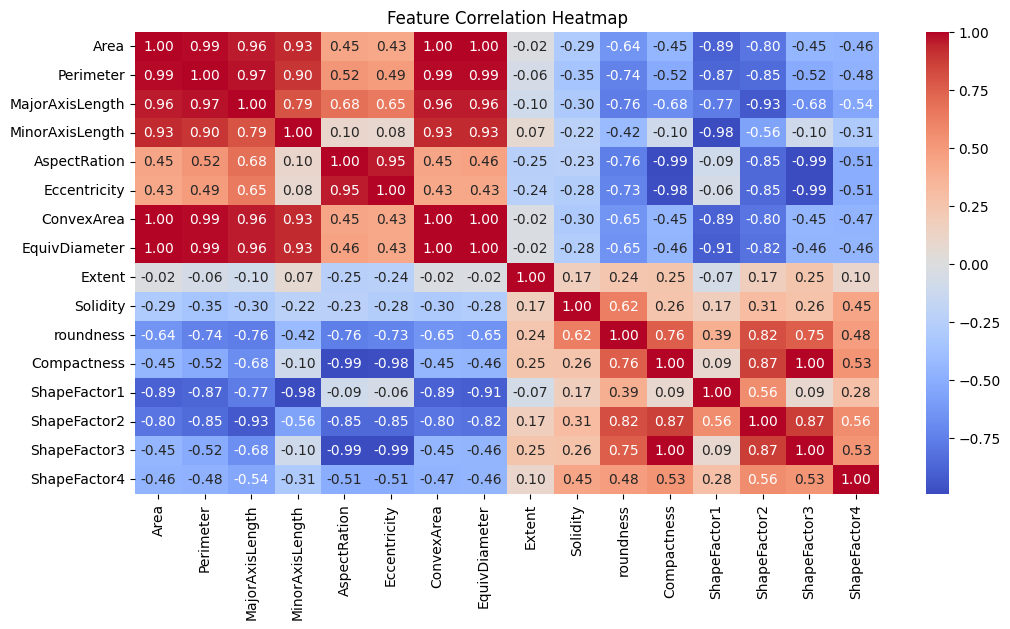

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-17-d612f49ae07b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette='viridis')


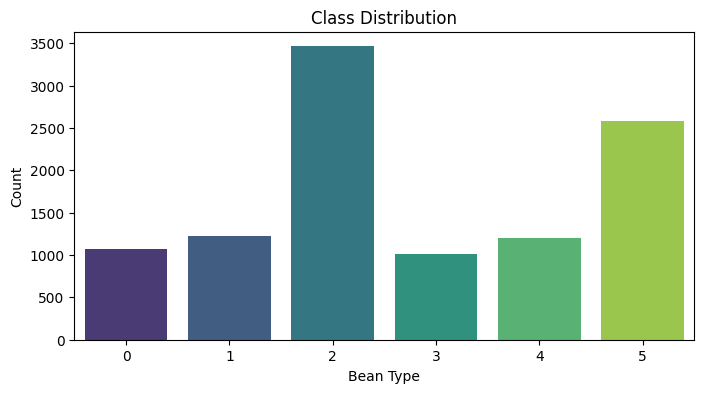

In [ ]:
# Count plot of Class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Class'], palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Bean Type")
plt.ylabel("Count")
plt.show()

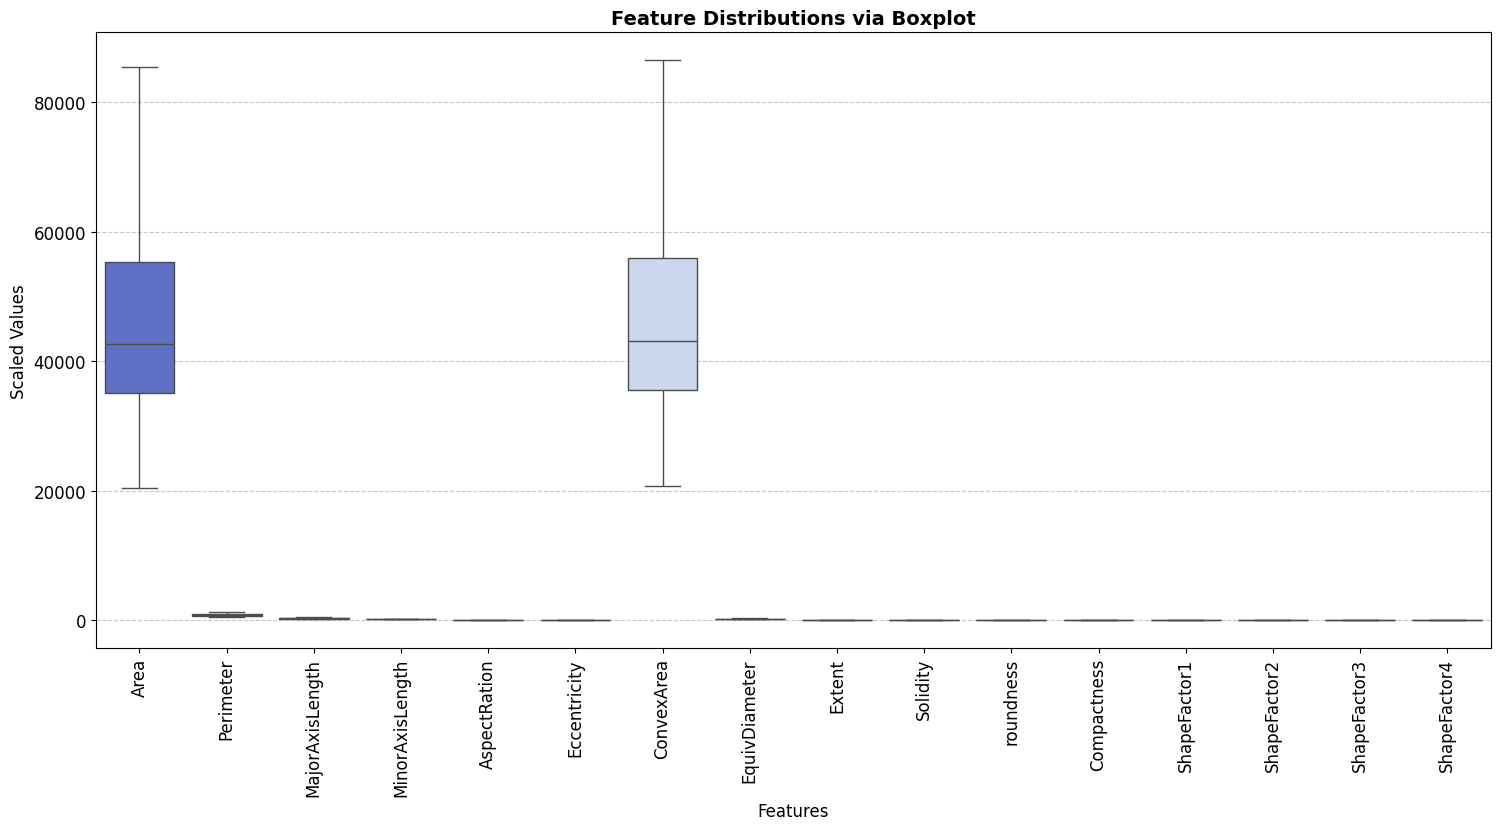

In [ ]:
# Boxplot to visualize feature distributions
plt.figure(figsize=(18, 8))
sns.boxplot(data=df.iloc[:, :-1], palette="coolwarm", showfliers=False)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Feature Distributions via Boxplot", fontsize=14, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scaled Values", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

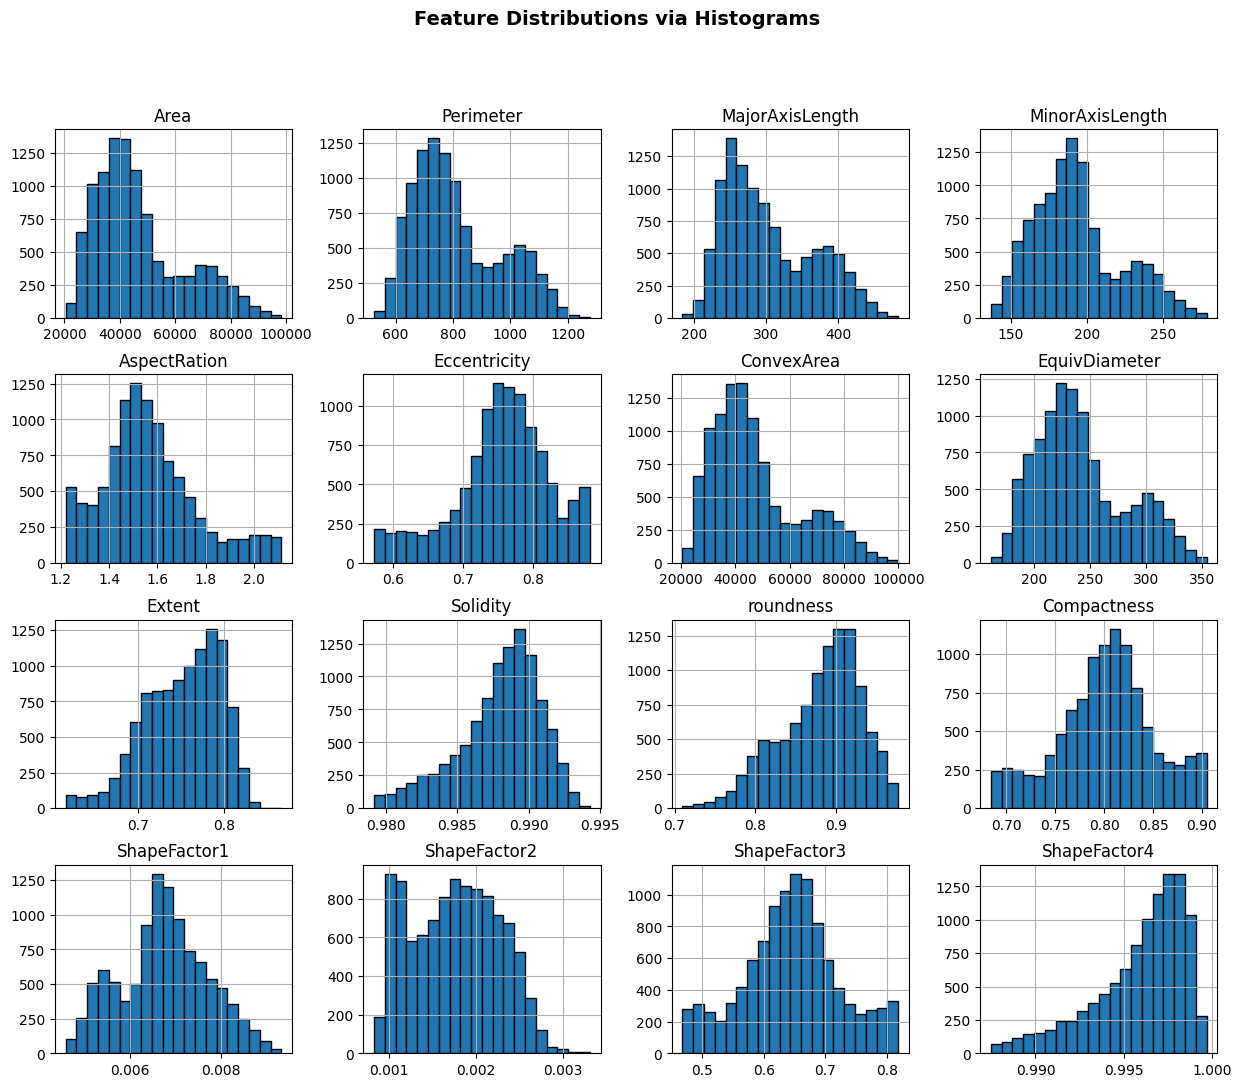

In [ ]:
# Histogram for feature distributions
df.iloc[:, :-1].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions via Histograms", fontsize=14, fontweight='bold')
plt.show()


# **Model selection**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))


Random Forest Classifier:
Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       208
           1       0.92      0.92      0.92       247
           2       0.90      0.92      0.91       674
           3       0.92      0.96      0.94       220
           4       0.92      0.89      0.90       248
           5       0.87      0.87      0.87       511

    accuracy                           0.90      2108
   macro avg       0.91      0.91      0.91      2108
weighted avg       0.90      0.90      0.90      2108



In [ ]:
# Support Vector Machine Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_svm))
print(classification_report(Y_test, Y_pred_svm))


Support Vector Machine:
Accuracy: 0.9141366223908919
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       208
           1       0.92      0.92      0.92       247
           2       0.92      0.92      0.92       674
           3       0.94      0.96      0.95       220
           4       0.92      0.92      0.92       248
           5       0.88      0.88      0.88       511

    accuracy                           0.91      2108
   macro avg       0.92      0.92      0.92      2108
weighted avg       0.91      0.91      0.91      2108



In [ ]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))



K-Nearest Neighbors:
Accuracy: 0.9041745730550285
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       208
           1       0.92      0.93      0.92       247
           2       0.90      0.92      0.91       674
           3       0.94      0.95      0.94       220
           4       0.93      0.89      0.91       248
           5       0.87      0.87      0.87       511

    accuracy                           0.90      2108
   macro avg       0.91      0.91      0.91      2108
weighted avg       0.90      0.90      0.90      2108



In [ ]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print(classification_report(Y_test, Y_pred_dt))


Decision Tree Classifier:
Accuracy: 0.8723908918406073
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       208
           1       0.90      0.91      0.90       247
           2       0.88      0.89      0.89       674
           3       0.89      0.92      0.91       220
           4       0.88      0.87      0.87       248
           5       0.83      0.82      0.82       511

    accuracy                           0.87      2108
   macro avg       0.88      0.88      0.88      2108
weighted avg       0.87      0.87      0.87      2108



In [ ]:
# Logistic Regression Classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print(classification_report(Y_test, Y_pred_lr))



Logistic Regression:
Accuracy: 0.9103415559772297
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       208
           1       0.91      0.92      0.92       247
           2       0.93      0.91      0.92       674
           3       0.93      0.95      0.94       220
           4       0.91      0.92      0.92       248
           5       0.87      0.89      0.88       511

    accuracy                           0.91      2108
   macro avg       0.91      0.91      0.91      2108
weighted avg       0.91      0.91      0.91      2108



# **Model Accuracy Comparison**

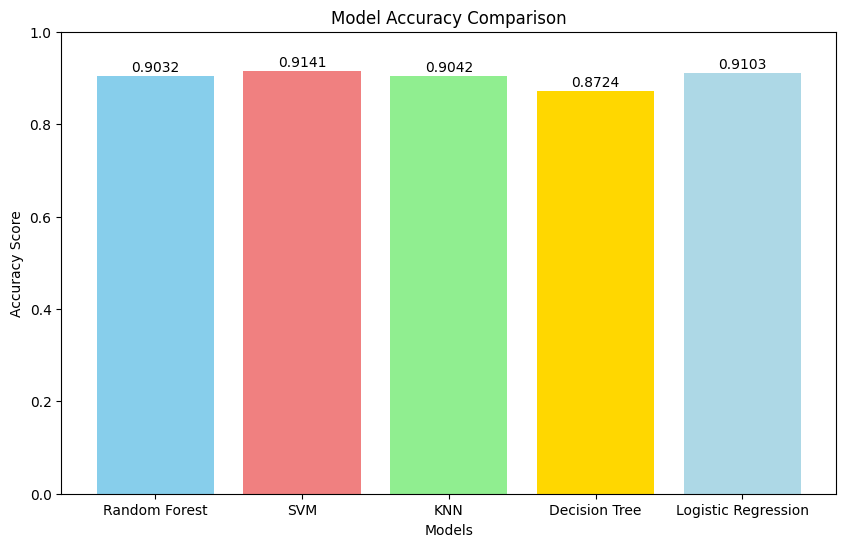

In [ ]:

# Model Accuracy Comparison
models = ['Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Logistic Regression']
accuracy_scores = [accuracy_score(Y_test, Y_pred_rf),
                   accuracy_score(Y_test, Y_pred_svm),
                   accuracy_score(Y_test, Y_pred_knn),
                   accuracy_score(Y_test, Y_pred_dt),
                   accuracy_score(Y_test, Y_pred_lr)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
# Set y-axis limit to 0-1 for accuracy scores
# Display accuracy values above the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()



From the above model comparison analysis using bar chart the Dry_Bean_ Dataset showing more model accuracy score in Support Vector Machine Classifier (SVM)